In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


<Axes: xlabel='SkinThickness', ylabel='Insulin'>

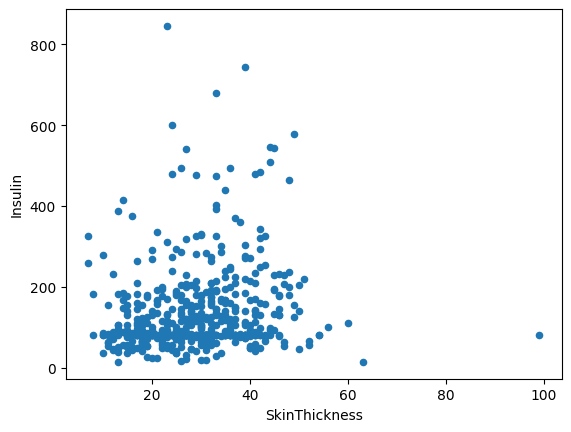

In [10]:
# @title SkinThickness vs Insulin

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SkinThickness', y='Insulin')

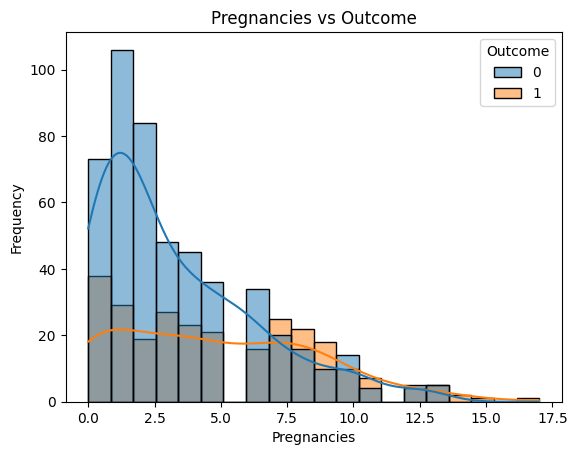

In [11]:
sns.histplot(data=data, x='Pregnancies', hue='Outcome', bins=20, kde=True)
plt.title('Pregnancies vs Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

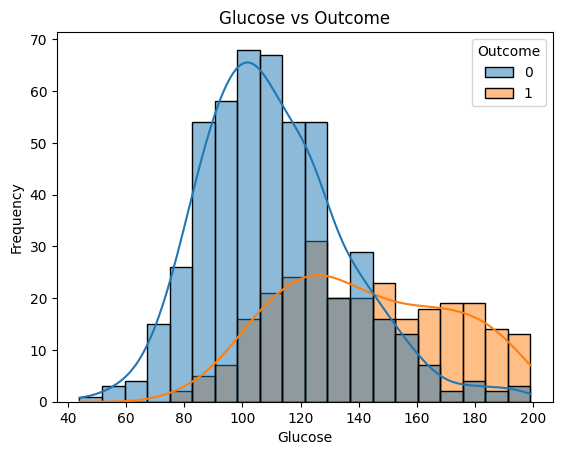

In [12]:
sns.histplot(data=data, x='Glucose', hue='Outcome', bins=20, kde=True)
plt.title('Glucose vs Outcome')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

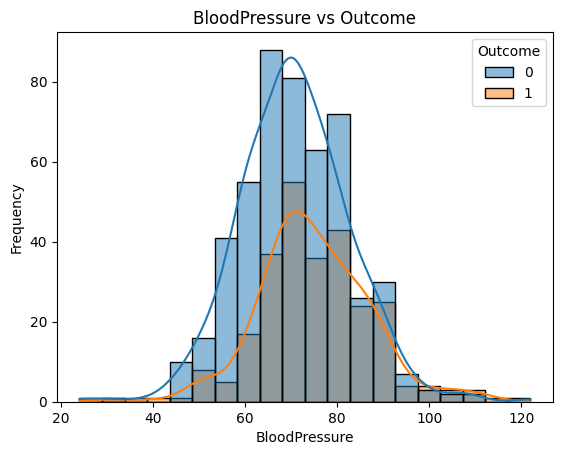

In [13]:
sns.histplot(data=data, x='BloodPressure', hue='Outcome', bins=20, kde=True)
plt.title('BloodPressure vs Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

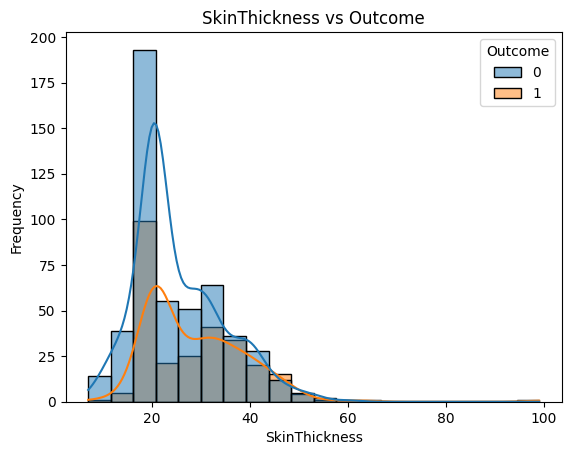

In [14]:
sns.histplot(data=data, x='SkinThickness', hue='Outcome', bins=20, kde=True)
plt.title('SkinThickness vs Outcome')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

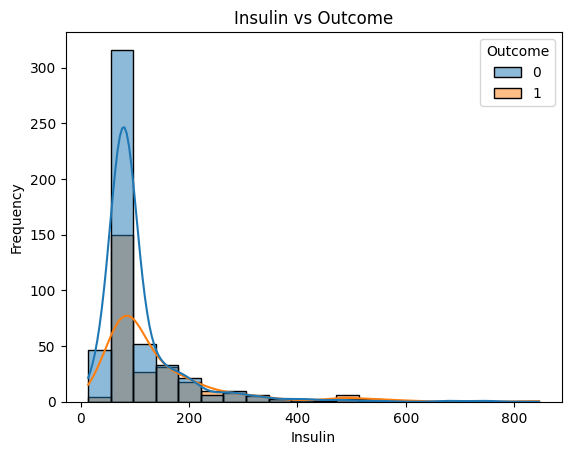

In [15]:
sns.histplot(data=data, x='Insulin', hue='Outcome', bins=20, kde=True)
plt.title('Insulin vs Outcome')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

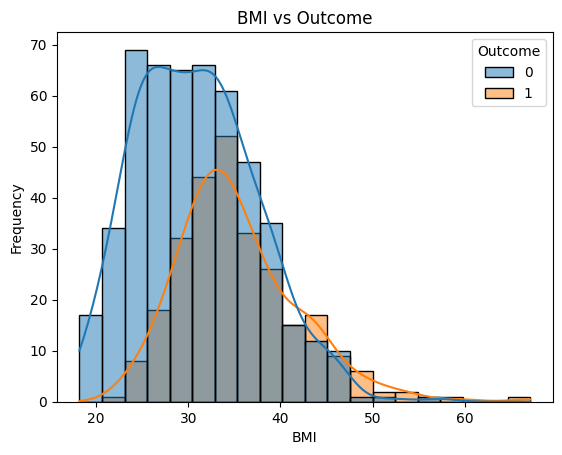

In [16]:
sns.histplot(data=data, x='BMI', hue='Outcome', bins=20, kde=True)
plt.title('BMI vs Outcome')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

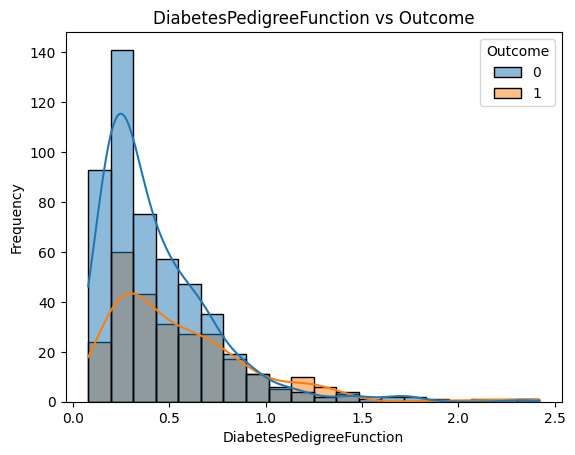

In [17]:
sns.histplot(data=data, x='DiabetesPedigreeFunction', hue='Outcome', bins=20, kde=True)
plt.title('DiabetesPedigreeFunction vs Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

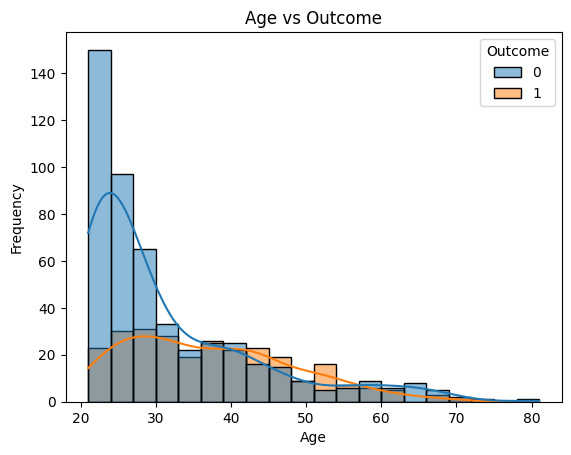

In [18]:
sns.histplot(data=data, x='Age', hue='Outcome', bins=20, kde=True)
plt.title('Age vs Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: >

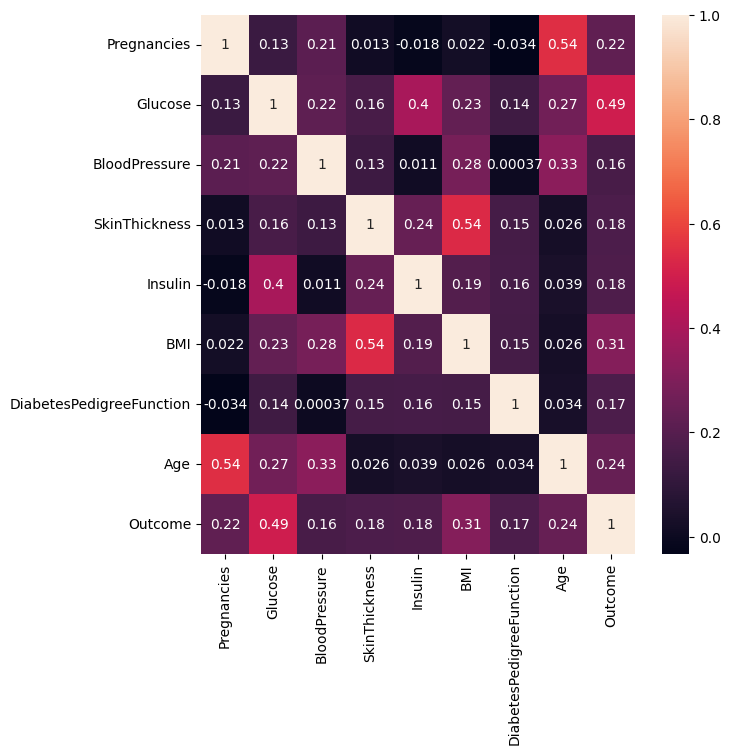

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(data=data.corr(),annot=True)

<Axes: >

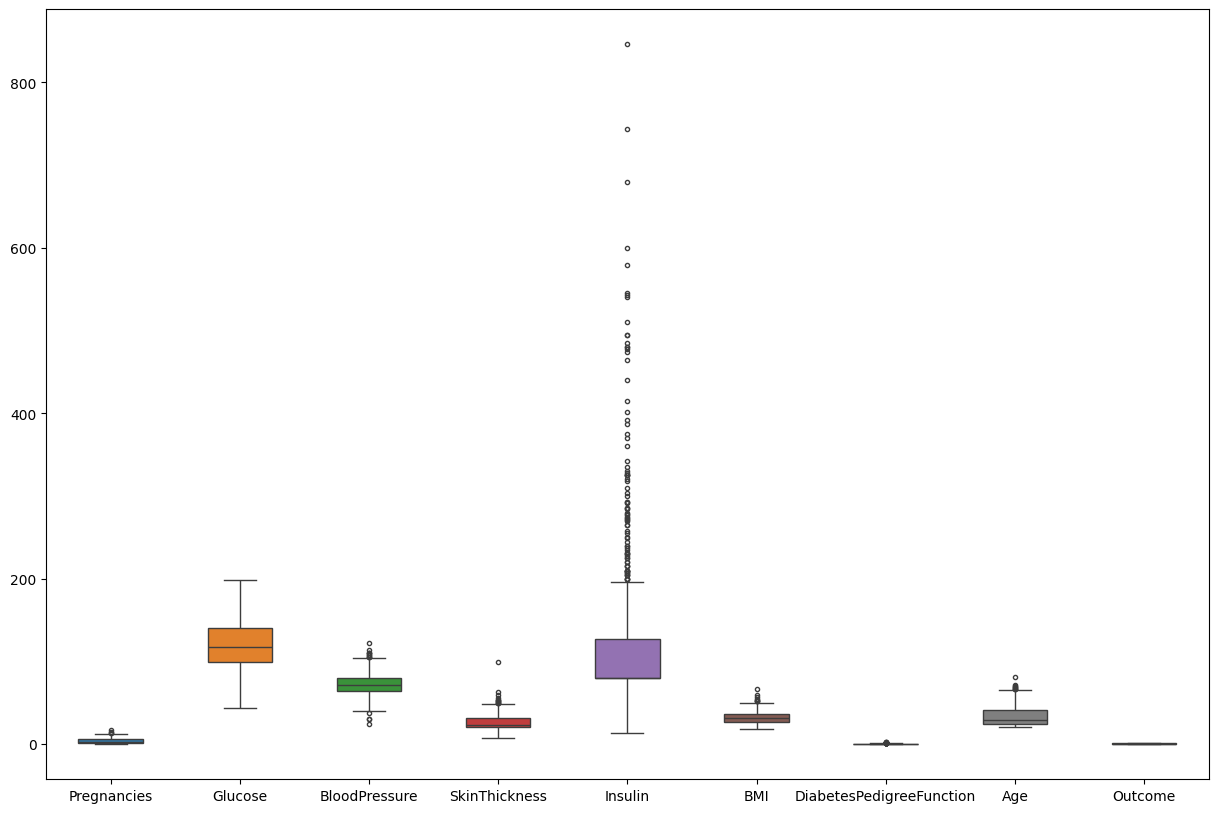

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [55]:
X = data.drop(columns = ['Outcome'],axis=1)
y = data['Outcome']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [57]:
import pickle
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    file = open('scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled

In [58]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [59]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]], shape=(576, 8))

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [61]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [63]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
parameters = {
    'penalty' : ['l1','l2','elasticnet',None],
    'C'       : [100, 10, 1.0, 0.1, 0.01],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear','newton-cholesky', 'sag', 'saga'],
}

In [64]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,param_grid = parameters,scoring='accuracy',cv=15)
clf.fit(X_train_scaled,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,15
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [65]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [66]:
clf.best_score_

np.float64(0.7671165092217722)

In [67]:
y_pred = clf.predict(X_test_scaled)

In [68]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[116,  14],
       [ 28,  34]])

In [69]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [70]:
print(f"true_positive = {conf_mat[0][0]}")
print(f"false_positive = {conf_mat[0][1]}")
print(f"false_negative = {conf_mat[1][0]}")
print(f"true_negative = {conf_mat[1][1]}")

true_positive = 116
false_positive = 14
false_negative = 28
true_negative = 34


In [71]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

np.float64(0.78125)

In [74]:
parameters_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator = rf_classifier, param_grid = parameters_rf,
                          cv = 3, n_jobs = -1, verbose = 2)

In [75]:
rf_final=grid_search_rf.fit(X_train_scaled, y_train)

print(grid_search_rf.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [76]:
rf_final.best_score_

np.float64(0.763888888888889)

In [77]:
y_pred = rf_final.predict(X_test_scaled)

In [78]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[114,  16],
       [ 25,  37]])

In [79]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [80]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

np.float64(0.7864583333333334)

In [81]:
parameters_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 2, 3],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(estimator = xgb_classifier, param_grid = parameters_xgb,
                          cv = 3, n_jobs = -1, verbose = 2)

In [82]:
xgb_final=grid_search_xgb.fit(X_train_scaled, y_train)

print(grid_search_xgb.best_params_)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
{'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


In [83]:
xgb_final.best_score_

np.float64(0.765625)

In [84]:
y_pred = xgb_final.predict(X_test_scaled)

In [85]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[120,  10],
       [ 36,  26]])

In [86]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [87]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

np.float64(0.7604166666666666)

In [88]:
import pickle
file = open('xgb_model.pkl','wb')
pickle.dump(xgb_final,file)
file.close()